<a href="https://colab.research.google.com/github/MohitDhungana/duplicate_question_detection/blob/master/DQD_mohit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
print("TEST COLAB AND GITHUB INTEGRATION")

TEST COLAB AND GITHUB INTEGRATION


In [123]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [124]:
!ls '/content/drive/My Drive'

 case-study-sample.gdoc			   'Computer Network'
 CG					    Datasets
'Ch04-Digital Transmission.gslides'	   'Endnote X8'
'Ch05-Analog Transmission.gslides'	    flower.csv
 Ch06-BWutilization-Mux-Spreading.gslides   OOAD_Final
 Ch07-TxmMedia.gslides			   'Project Management'
 Ch08-Switching-Forouzan.gslides	    Resume.gdoc
 Ch10-ErrorDetCorrection.gslides	   'Software engineering'
 COA					    stock_price.csv
'Colab Notebooks'


In [0]:
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import keras.backend as K
import keras

In [0]:
df=pd.read_csv('/content/drive/My Drive/Datasets/train.csv')

In [127]:
df.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [128]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [129]:
import re
print('ab1c3')
print(re.sub(r"[a-z]",'','ab1c3'))
print(re.sub(r"[^a-z]",'','ab1c3'))

ab1c3
13
abc


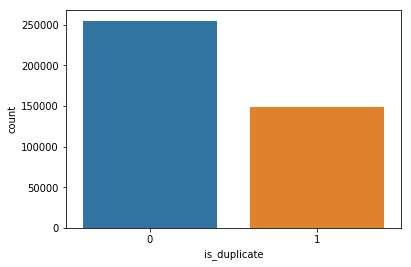

In [130]:
import seaborn as sns
sns.countplot(df['is_duplicate'],label='count')

In [131]:
len(df[df['is_duplicate']==0])

255027

In [132]:
#iloc selects using index of [row,column/s] as integer values
df.iloc[1,[3,4]]

question1    What is the story of Kohinoor (Koh-i-Noor) Dia...
question2    What would happen if the Indian government sto...
Name: 1, dtype: object

In [133]:
# loc selects using index value and label name/s
df.loc[1,['question1','question2']]

question1    What is the story of Kohinoor (Koh-i-Noor) Dia...
question2    What would happen if the Indian government sto...
Name: 1, dtype: object

In [0]:
ques1=df.loc[:,'question1']
# ques1=str(ques1)
# ques1=ques1.split()
# ques1[-2]


In [135]:
from sklearn.model_selection import train_test_split

question_cols=['question1','question2']

# q1=df.question1[0:5]
# q2=df.question2[0:5]

X=df[question_cols]
Y=df.is_duplicate

# split train-test data in 80-20% ratio
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size = 0.2, random_state=50)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# Split to dicts
x_train = {'left': x_train.question1, 'right': x_train.question2}
x_test = {'left': x_test.question1, 'right': x_test.question2}

y_train=y_train.values
y_test=y_test.values

(323432, 2)
(80858, 2)
(323432,)
(80858,)


In [0]:
def manhattan_distance(left,right):
  return K.exp(-K.sum(K.abs(left-right), keepdims=True))

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
left_input (InputLayer)         (None, 50)           0                                            
__________________________________________________________________________________________________
right_input (InputLayer)        (None, 50)           0                                            
__________________________________________________________________________________________________
embedding_layer (Embedding)     (None, 50, 300)      300000      left_input[0][0]                 
                                                                 right_input[0][0]                
__________________________________________________________________________________________________
LSTM_layer (LSTM)               (None, 50)           70200       embedding_layer[0][0]            
          

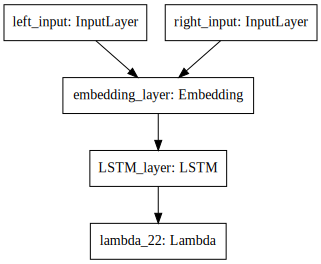

In [137]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, concatenate, Lambda


# input layer
#recheck shape before training
left_input = Input(shape = (50,), name = 'left_input')
right_input = Input(shape = (50,), name = 'right_input')



# embedding layer
# recheck dims 
embedding_layer = Embedding(input_dim = 1000, output_dim = 300, input_length = 1000, name = 'embedding_layer')

encoded_left = embedding_layer(left_input)
encoded_right = embedding_layer(right_input)



#LSTM instantiation
# check parameter for LSTM.
shared_lstm = LSTM(50, name = 'LSTM_layer')

# shared LSTM
left_output = shared_lstm(encoded_left)
right_output = shared_lstm(encoded_right)




# TODO: check output shape of the output lambda layer
# output layer
output_layer = Lambda(function = lambda x : manhattan_distance(x[0], x[1]))([left_output, right_output])



# define above model
model = tf.keras.Model(inputs=[left_input, right_input], outputs=output_layer)

# summary of model
print(model.summary())




# plot graph

import IPython
from IPython.display import SVG

IPython.display.SVG(keras.utils.vis_utils.model_to_dot(model).create(prog='dot', format='svg'))


In [0]:
# compile the model
from time import time
from tensorflow.keras.optimizers import Adadelta
from keras.callbacks import TensorBoard
LOG_DIR="/root/logs"
tensorboard = TensorBoard(log_dir=LOG_DIR.format(time()))

# optimizer = Adadelta(clipnorm = 1.25)
model.compile(optimizer = Adadelta(clipnorm = 1.25), loss = 'binary_crossentropy', metrics = ['accuracy'])

# train (fit) the model
# hist = model.fit([x_train['left'], x_train['right']], y_train, epochs=5, shuffle=True, validation_data=([x_test['left'], x_test['right']], y_test), callbacks=[tensorboard])
# print(hist.history)

# # Plot training & validation accuracy values
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

# # Plot training & validation loss values
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

In [139]:
txt='A IS a dog a is.'

from tensorflow.keras.preprocessing.text import text_to_word_sequence,Tokenizer,one_hot,hashing_trick
print(txt)
# tokenizer=Tokenizer(lower=True, split=' ')
print(text_to_word_sequence(txt,lower=True, split=' '))
print(hashing_trick(txt,n=10,lower=True,split=' '))
print(one_hot(txt,n=10,lower=True,split=' '))

A IS a dog a is.
['a', 'is', 'a', 'dog', 'a', 'is']
[9, 7, 9, 9, 9, 7]
[9, 7, 9, 9, 9, 7]


In [0]:
def text_to_token(text):
  text=str(text)
  text=text.lower()
  text=text.split()
  
  return text

In [141]:
# for i in range(len(q1)):
#   print(text_to_token(q1[i])) 

a=['asdfafd']
b='zzzz'
a.append(b)
print(a)

['asdfafd', 'zzzz']


In [142]:
import math
z=0
print("normal expornent",math.exp(-z))
print("inverse expornent",1/1-math.exp(-z))
# print(k.exp(-5.1))


normal expornent 1.0
inverse expornent 0.0


In [0]:
# dis=lambda m:m[0]+m[1]
# dis=lambda m: (m[0][0], 1)
# dis([2.222,4.444])